# Neural & Behavioral Modeling - Week 10 (Exercises)
by 駱皓正(austenpsy@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 A Two-layered Linear Network as a Regression Model (7 points)
Data fitting of the following network is poor. Please check if adding bias terms or chaging network hyperparameters (e.g., learning rate, amount of training, etc.) help. If not, please explain why the fitting is poor given that the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set.

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.679 -0.   ]
 [ 0.643  0.   ]
 [ 1.321  0.   ]
 [-0.     0.643]
 [ 0.     0.643]
 [ 0.     1.286]]


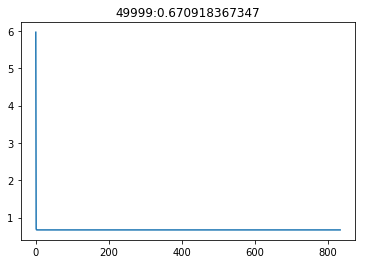

In [4]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix

eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.835  0.165]
 [ 0.831  0.169]
 [ 1.165 -0.165]
 [ 0.169  0.831]
 [ 0.17   0.83 ]
 [-0.162  1.162]]


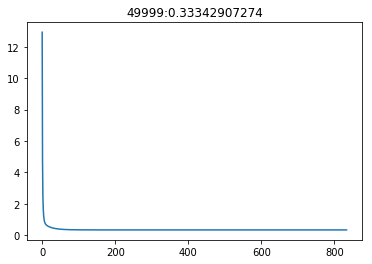

In [30]:
### Write your codes with bias terms here
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

#training data
X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
#Np = 6; Nx = 4
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
#Np = 6; Ny = 2
W=random.rand(Ny,Nx+1); # set initially random connectivity matrix
#1 represent bias term

eta=.01; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    x0=append(X[p],1) #adding bias term
    y=W.dot(x0)
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,x0) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        x=hstack([X,ones([Np,1])]) # append bias to all input patterns
        predY=W.dot(x.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

###  Discussions

Given the original set of hyperparameters, after the bias term added, the total error decreased in 50% (from 0.670 to 0.345). Letting learning rate to be 1/10 of original, total error decreased (from 0.345 to 0.333). The effects of other hyperparameter has few impacts.

## 2 PyTorch (3 points)
Read <a href="http://noahsnail.com/2017/09/18/2017-9-18-PyTorch%E5%9F%BA%E6%9C%AC%E7%94%A8%E6%B3%95(%E4%B8%80)%E2%80%94%E2%80%94Numpy%EF%BC%8CTorch%E5%AF%B9%E6%AF%94/">this tutorial</a> first and port the following Instar Learning from NumPy to PyTorch:

In [5]:
# Instar learning:
x=array([0.1,0.3,0.5])
W=random.rand(3)
for i in range(10): # trials 
    y=dot(W,x) 
    print(W,y)
    W+=y*(x-W) # Postsynaptically gated InStar 

[ 0.48145628  0.17285606  0.26581023] 0.232907559369
[ 0.39261223  0.20246885  0.32035479] 0.260179273937
[ 0.31648059  0.22784443  0.36709475] 0.283548765228
[ 0.25509779  0.24830405  0.40477987] 0.302390930796
[ 0.20819762  0.26393644  0.43357358] 0.316787481547
[ 0.17392197  0.27536092  0.45461663] 0.327308791623
[ 0.14972666  0.28342551  0.46947101] 0.334735823618
[ 0.13308137  0.28897359  0.47969016] 0.339845290271
[ 0.12183882  0.29272086  0.48659236] 0.343296320546
[ 0.11434163  0.29521976  0.49119515] 0.345597669037


In [6]:
### Write your PyTorch codes here
import torch as t

xt = t.from_numpy(x)
H = t.from_numpy(W)
for i in range(10): # trials 
    y=t.dot(H,xt) 
    print(H,y)
    H+=y*(x-H) # Postsynaptically gated InStar 

tensor([ 0.1094,  0.2969,  0.4942], dtype=torch.float64) tensor(0.3471, dtype=torch.float64)
tensor([ 0.1061,  0.2980,  0.4962], dtype=torch.float64) tensor(0.3481, dtype=torch.float64)
tensor([ 0.1040,  0.2987,  0.4975], dtype=torch.float64) tensor(0.3488, dtype=torch.float64)
tensor([ 0.1026,  0.2991,  0.4984], dtype=torch.float64) tensor(0.3492, dtype=torch.float64)
tensor([ 0.1017,  0.2994,  0.4990], dtype=torch.float64) tensor(0.3495, dtype=torch.float64)
tensor([ 0.1011,  0.2996,  0.4993], dtype=torch.float64) tensor(0.3497, dtype=torch.float64)
tensor([ 0.1007,  0.2998,  0.4996], dtype=torch.float64) tensor(0.3498, dtype=torch.float64)
tensor([ 0.1005,  0.2998,  0.4997], dtype=torch.float64) tensor(0.3499, dtype=torch.float64)
tensor([ 0.1003,  0.2999,  0.4998], dtype=torch.float64) tensor(0.3499, dtype=torch.float64)
tensor([ 0.1002,  0.2999,  0.4999], dtype=torch.float64) tensor(0.3499, dtype=torch.float64)
